In [1]:
from pymongo import MongoClient
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import igraph as ig
from reddit import plotting, network
from reddit import datahandling as dh
%load_ext autoreload
%autoreload 2

In [ ]:
subreddit = ''

In [ ]:
client = MongoClient('localhost', 27017)
db = client.reddit
dh.save_to_hdf5(db, 'comments', 'data/raw/{}.h5'.format(subreddit), subreddit)
dh.preprocess_hdf('data/raw/{}.h5'.format(subreddit), 'data/proc/{}.h5'.format(subreddit))

In [2]:
subreddits = ['IAmA','desmoines']

In [4]:
graphs = []
for f in tqdm(subreddits):
    G = network.hdf_to_net('data/proc/final/{}.h5'.format(f),directed=True)
    graphs.append(G)

100%|██████████| 2/2 [03:29<00:00, 104.66s/it]


Text(0.5, 1.0, 'Degree Distributions')

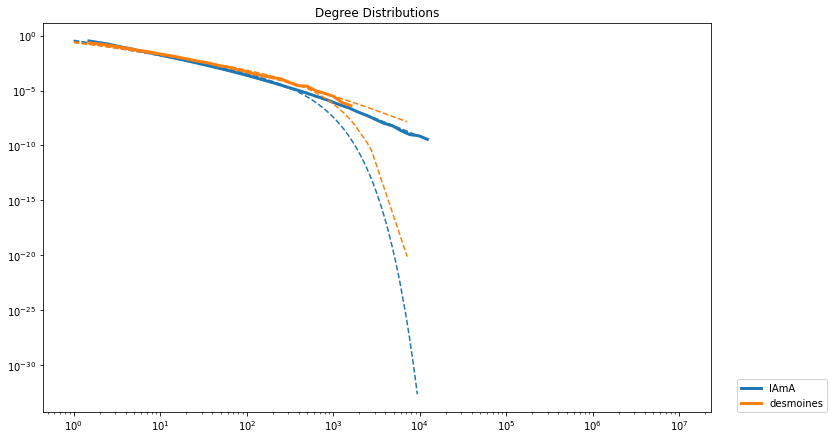

In [9]:
fig, axis = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(10)
fig.tight_layout()
color= sns.color_palette()
for idx, g in enumerate(graphs):
    plotting.plot_degr_distr(g, axis, color[idx], subreddits[idx], show_fit='best')
    axis.legend(loc=(1.04, 0))
plt.title('Degree Distributions')

In [ ]:
cc = np.mean(np.nan_to_num((g.as_undirected().transitivity_local_undirected())))
avg_degr = np.mean(g.degree())
concomp = np.shape(g.components())[0]
vc = g.components()
partofgc = np.max(vc.sizes())/g.vcount()
vert = g.vcount()
nodes = g.ecount()